Wine Reviews - Group 3 🍷



1) Introduction

In [ ]:
#  importing of libraries needed for below notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [ ]:
# Load CSV file and read 
#df = pd.read_csv('winemag-data-130k-v2.csv',index_col=0)
def trim(dataset):
    trim = lambda x: x.strip() if type(x) is str else x
    return dataset.applymap(trim)
df = trim(pd.read_csv('winemag-data-130k-v2.csv', index_col=0))

In [ ]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))

Rows, columns: (129971, 14)


In [ ]:
# View first 10 rows of Data Frame  
df.head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [ ]:
df.info() # Show content type of each column and totals

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


2) Data Wrangling

In [ ]:
print ( 'The number of Duplicate values in the DF is {}'.format(len(df)-len(df.drop_duplicates())))


The number of Duplicate values in the DF is 9983


In [ ]:
df = df.drop_duplicates() # reinstating Dataframe less all duplicates 

In [ ]:
print ( 'The number of Duplicate values in the DF is {} after dropping them'.format(len(df)-len(df.drop_duplicates())))

The number of Duplicate values in the DF is 0 after dropping them


In [ ]:
# Counts all empty values in DF for each column
# Works ouyt what % of the full Data set these Nan equate to per column 
# Rounds % missing data to 2 decimal places
# displays data 
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['Percent']=missing_data['Percent'].round(2)
null = (df.isnull().sum().sum())
print('There are {} NaN values\n'.format(null))
missing_data

There are 190201 NaN values



,Total,Percent
region_2,73219,61.02
designation,34545,28.79
taster_twitter_handle,29446,24.54
taster_name,24917,20.77
region_1,19560,16.30
price,8395,7.00
country,59,0.05
province,59,0.05
variety,1,0.00
description,0,0.00


In [ ]:
designation_avg = df.groupby(by=['designation']).mean().sort_values('price', ascending=False) ######### 

In [ ]:
df['price'] = df['price'].fillna(df.groupby(by=['variety'])['price'].transform('mean')) # Assigns all Nan in Price Column the Mean Average value 

In [ ]:
# Counts all empty values in DF for each column
# Works ouyt what % of the full Data set these Nan equate to per column 
# Rounds % missing data to 2 decimal places
# displays data 
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['Percent']=missing_data['Percent'].round(2)
null_1 = (df.isnull().sum().sum())
print('We have removed {} NaN values from the DF. There are now {} NaN values\n'.format((null-null_1), null_1))
missing_data

We have removed 8385 NaN values from the DF. There are now 181816 NaN values



,Total,Percent
region_2,73219,61.02
designation,34545,28.79
taster_twitter_handle,29446,24.54
taster_name,24917,20.77
region_1,19560,16.30
country,59,0.05
province,59,0.05
price,10,0.01
variety,1,0.00
description,0,0.00


In [ ]:
price_missing = df.loc[df['price'].isna()] # Calculates the Missing Values in the Price column 

In [ ]:
price_missing # Displays rows with Missing Value in Price 

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
11639,France,Part of a new range from this producer featuri...,NaN,85,NaN,France Other,Vin de France,NaN,Roger Voss,@vossroger,Lionel Osmin & Cie 2014 Ekigaïna (Vin de France),Ekigaïna,Lionel Osmin & Cie
25841,Slovenia,Honey and orange rind notes meld with a hint o...,Petite Burja,88,NaN,Vipavska Dolina,NaN,NaN,Anna Lee C. Iijima,NaN,Burja 2011 Petite Burja Zelen (Vipavska Dolina),Zelen,Burja
38757,Argentina,"Unique for Argentina is this type of blend, wh...",Alfa Crux,91,NaN,Mendoza Province,Uco Valley,NaN,Michael Schachner,@wineschach,O. Fournier 2006 Alfa Crux Tempranillo-Malbec ...,Tempranillo-Malbec,O. Fournier
40162,Germany,Cool alpine notes of evergreen and forest floo...,Schloss Castell Trocken,91,NaN,Franken,NaN,NaN,Anna Lee C. Iijima,NaN,Castell 2015 Schloss Castell Trocken Bacchus (...,Bacchus,Castell
63460,France,Fermenting in oak and using the rare Petit Mes...,Authentis Brut,89,NaN,Champagne,Champagne,NaN,Roger Voss,@vossroger,Duval-Leroy 2005 Authentis Brut Petit Meslier ...,Petit Meslier,Duval-Leroy
73001,France,"This ancient Corsican grape, found only in sma...",1769,89,NaN,France Other,Vin de France,NaN,Roger Voss,@vossroger,Clos Venturi 2016 1769 Biancu Gentile (Vin de ...,Biancu Gentile,Clos Venturi
73417,France,There is an attractive herbaceous character to...,Presto,86,NaN,Southwest France,Côtes de Gascogne,NaN,Roger Voss,@vossroger,Domaine Seailles 2014 Presto Sauvignon Blanc-S...,Sauvignon Blanc-Sauvignon Gris,Domaine Seailles
93558,Portugal,"Made from old Vital vines, this is a rich, bea...",Casal Figueira António,90,NaN,Lisboa,NaN,NaN,Roger Voss,@vossroger,Obrigado 2012 Casal Figueira António Vital (Li...,Vital,Obrigado
95603,Portugal,This bright pink wine is lightly sweet and ful...,Rosé,84,NaN,Vinho Verde,NaN,NaN,Roger Voss,@vossroger,Conde Villar 2011 Rosé Espadeiro (Vinho Verde),Espadeiro,Conde Villar
116970,Italy,"Roscetto, a little-known white grape from cent...",Ferentano,88,NaN,Central Italy,Lazio,NaN,NaN,NaN,Falesco 2008 Ferentano Roscetto (Lazio),Roscetto,Falesco


In [ ]:
#####
df.loc[df['variety'].isin(price_missing['variety'])].groupby(by=['variety']).count()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,winery
variety,,,,,,,,,,,,
Bacchus,1,1,1,1,0,1,0,0,1,0,1,1
Biancu Gentile,1,1,1,1,0,1,1,0,1,1,1,1
Ekigaïna,1,1,0,1,0,1,1,0,1,1,1,1
Espadeiro,1,1,1,1,0,1,0,0,1,1,1,1
Petit Meslier,1,1,1,1,0,1,1,0,1,1,1,1
Roscetto,1,1,1,1,0,1,1,0,0,0,1,1
Sauvignon Blanc-Sauvignon Gris,1,1,1,1,0,1,1,0,1,1,1,1
Tempranillo-Malbec,1,1,1,1,0,1,1,0,1,1,1,1
Vital,1,1,1,1,0,1,0,0,1,1,1,1


In [ ]:
# Drops all NaN values from price and Variety columns 
df = df.dropna(subset=['price', 'variety'])

In [ ]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['Percent']=missing_data['Percent'].round(2)
null_2 = (df.isnull().sum().sum())
print('We have removed {} NaN values from the DF. There are now {} NaN values\n'.format((null_1-null_2), null_2))

missing_data

We have removed 35 NaN values from the DF. There are now 181781 NaN values



,Total,Percent
region_2,73208,61.02
designation,34543,28.79
taster_twitter_handle,29442,24.54
taster_name,24915,20.77
region_1,19555,16.30
country,59,0.05
province,59,0.05
description,0,0.00
points,0,0.00
price,0,0.00


In [ ]:
####
df['price'] = df['price'].round().astype(int)

In [ ]:
# Displays a DF of all rows where country is NaN
country_missing = df.loc[df['country'].isna()]

In [ ]:
country_missing

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,36,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis
9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi
11150,NaN,"A blend of 85% Melnik, 10% Grenache Noir and 5...",NaN,89,20,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2013 Melnik,Melnik,Orbelus
11348,NaN,"Light and fruity, this is a wine that has some...",Partager,82,23,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager White,White Blend,Barton & Guestier
14030,NaN,"This Furmint, grown in marl soils, has aromas ...",Márga,88,25,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2013 Márga White,White Blend,St. Donat
16000,NaN,"Jumpy, jammy aromas of foxy black fruits are s...",Valle de los Manantiales Vineyard,86,40,NaN,NaN,NaN,Michael Schachner,@wineschach,Familia Deicas 2015 Valle de los Manantiales V...,Tannat,Familia Deicas
16749,NaN,Winemaker: Bartho Eksteen. This wooded Sauvy s...,Cape Winemakers Guild Vloekskoot Wooded,91,20,NaN,NaN,NaN,Lauren Buzzeo,@laurbuzz,Bartho Eksteen 2016 Cape Winemakers Guild Vloe...,Sauvignon Blanc,Bartho Eksteen


In [ ]:
#####
df.loc[df['designation'].isin(country_missing['designation'])].groupby(by=['designation']).count()

,country,description,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
designation,,,,,,,,,,,,
Aliwen Reserva,19,20,20,20,19,0,0,20,20,20,20,20
Amphora,0,1,1,1,0,0,0,1,1,1,1,1
Askitikos,0,1,1,1,0,0,0,1,1,1,1,1
Asureti Valley,0,1,1,1,0,0,0,1,1,1,1,1
Babaneuri Valley,0,1,1,1,0,0,0,1,1,1,1,1
Cape Winemakers Guild Vloekskoot Wooded,1,2,2,2,1,0,0,2,2,2,2,2
Cape Winemakers Guild Windansea,0,1,1,1,0,0,0,1,1,1,1,1
Catalina,7,8,8,8,7,0,0,8,8,8,8,8
Domaine de la Treille,0,1,1,1,0,0,0,1,1,1,1,1


In [ ]:
####
for des in country_missing['designation']:
  if len(df.loc[df['designation']==des].country.unique()) == 2:
    print(des)
    print(df.loc[df['designation']==des].country.unique())

Cape Winemakers Guild Vloekskoot Wooded
[nan 'South Africa']
Aliwen Reserva
['Chile' nan]
Steirische Klassik
['Austria' nan]
Steirische Klassik
['Austria' nan]
Royal
['Spain' nan]
Steirische Klassik
['Austria' nan]
Catalina
['Chile' nan]
Steintal
['Austria' nan]
Nobile
['US' nan]
Steirische Klassik
['Austria' nan]
Klausen
['Austria' nan]
Gemischter Satz
['Austria' nan]
Steirische Klassik
['Austria' nan]


In [ ]:
####

countries_to_fill = {}
for des in country_missing['designation']:
  countries_unique = df.dropna(subset=['country']).loc[df['designation']==des].country.unique()
  provinces_unique = df.dropna(subset=['country']).loc[df['designation']==des].province.unique()
  if len(countries_unique) == 1 and len(provinces_unique) == 1:

    countries_to_fill[des]=(countries_unique[0], provinces_unique[0])
    print(df.dropna(subset=['country']).loc[df['designation']==des].country.unique())
    print(provinces_unique)
  elif len(countries_unique) == 1:
    countries_to_fill[des]=(countries_unique[0], None)
print(countries_to_fill)

['South Africa']
['Hemel en Aarde']
['Spain']
['Northern Spain']
['Austria']
['Südoststeiermark']
['US']
['California']
{'Cape Winemakers Guild Vloekskoot Wooded': ('South Africa', 'Hemel en Aarde'), 'Aliwen Reserva': ('Chile', None), 'Steirische Klassik': ('Austria', None), 'Royal': ('Spain', 'Northern Spain'), 'Catalina': ('Chile', None), 'Steintal': ('Austria', 'Südoststeiermark'), 'Nobile': ('US', 'California'), 'Klausen': ('Austria', None), 'Gemischter Satz': ('Austria', None)}


In [ ]:
####
df_ctf = pd.DataFrame(countries_to_fill).T.reset_index()

In [ ]:
####
df_ctf.columns=['designation', 'country', 'province']

In [ ]:
####
df_ctf

,designation,country,province
0,Cape Winemakers Guild Vloekskoot Wooded,South Africa,Hemel en Aarde
1,Aliwen Reserva,Chile,None
2,Steirische Klassik,Austria,None
3,Royal,Spain,Northern Spain
4,Catalina,Chile,None
5,Steintal,Austria,Südoststeiermark
6,Nobile,US,California
7,Klausen,Austria,None
8,Gemischter Satz,Austria,None


In [ ]:
####
df1 = df.merge(df_ctf, how='left', on='designation')
df1['country_x'] = df1['country_x'].fillna(df1['country_y'])
df1['province_x'] = df1['province_x'].fillna(df1['province_y'])
df1 = df1.drop(['country_y', 'province_y'], axis=1)
df1 = df1.rename(columns={'country_x':'country', 'province_x':'province'})
df1 = df1.dropna(subset=['country', 'province'])

In [ ]:
#code to suma the NaN of each colum in the DF
# Shows sum of NaN and the % of the DF each sum is
total = df1.isnull().sum().sort_values(ascending = False)
percent = (df1.isnull().sum()/df1.isnull().count()*100).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data['Percent']=missing_data['Percent'].round(2) # rounds to 2 decimal places 

null_3 = (df1.isnull().sum().sum())
print('We have removed {} NaN values from the DF. There are now {} NaN values\n'.format((null_2-null_3), null_3))

missing_data # shows features of dataset with teh sum of their NaN Values 

We have removed 238 NaN values from the DF. There are now 181543 NaN values



,Total,Percent
region_2,73153,61.00
designation,34533,28.80
taster_twitter_handle,29442,24.55
taster_name,24915,20.78
region_1,19500,16.26
country,0,0.00
description,0,0.00
points,0,0.00
price,0,0.00
province,0,0.00


In [ ]:
####
df1[df1['designation']=='Aliwen Reserva']['province'].value_counts()

Rapel Valley                     6
Chile                            4
Curicó and Leyda Valleys         2
Maipo Valley                     2
Curicó Valley                    1
Leyda Valley-Maipo Valley        1
Curicó and Maipo Valleys         1
Maipo Valley-Colchagua Valley    1
Central Valley                   1
Name: province, dtype: int64

In [ ]:
print('There are {} different countries in the dataset'.format(len(df1['country'].unique()))) # How many diferent countries in the DF

There are 43 different countries in the dataset


3) Exploratory Data Analysis

In [ ]:
# caluculates the Mean Average point score and Price for each country and lists them with the highest first 
countries_to_plot = df1.groupby('country').mean().sort_values(by=('points'), ascending=False).reset_index() 

In [ ]:
countries_to_plot.head()

,country,points,price
0,England,91.746032,51.317460
1,India,90.250000,13.750000
2,Austria,90.130148,31.017463
3,Germany,89.895028,43.266198
4,Canada,89.309735,35.752212


In [ ]:
# Shows how many wines there are for each country in the DF
df1.country.value_counts()

US                        50458
France                    20349
Italy                     17939
Spain                      6117
Portugal                   5254
Chile                      4183
Argentina                  3543
Austria                    3035
Australia                  2197
Germany                    1991
South Africa               1302
New Zealand                1278
Israel                      466
Greece                      432
Canada                      226
Bulgaria                    132
Hungary                     129
Romania                     102
Uruguay                      98
Turkey                       81
Slovenia                     76
Georgia                      76
Croatia                      70
Mexico                       68
England                      63
Moldova                      56
Brazil                       49
Lebanon                      32
Morocco                      24
Peru                         16
Ukraine                      14
Czech Re

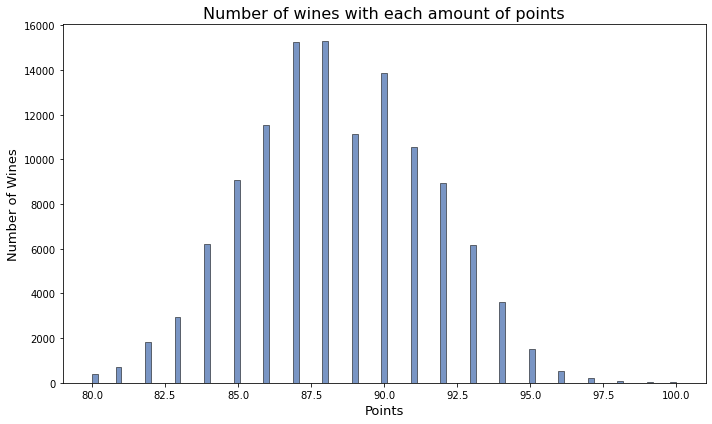

In [ ]:
# Plot hist plot showing the frequency of wines for each amount of Points 
sns.set_color_codes();
plt.figure(figsize=(10,6));
sns.histplot(df1.points, kde=False, color='b');
plt.title("Number of wines with each amount of points" , fontsize=16);
plt.xlabel("Points" , fontsize=13);
plt.ylabel("Number of Wines" , fontsize=13);


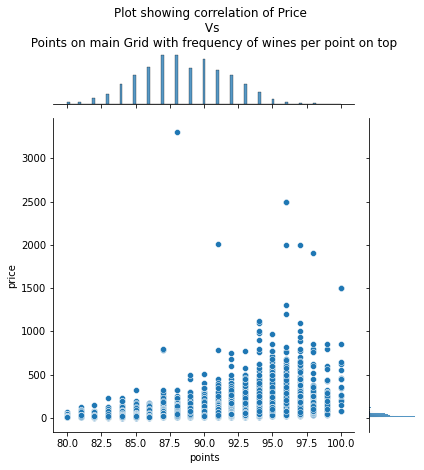

In [ ]:

# Makes plot showing Price v Points as a scater plot with the Hist plot from above jointed on
p = sns.jointplot(x='points', y='price', data=df1);
# Adds code to add a header to trhe top of the jointed Hist plot 
p.fig.suptitle("Plot showing correlation of Price \n Vs \n Points on main Grid with frequency of wines per point on top", y=1.08 );




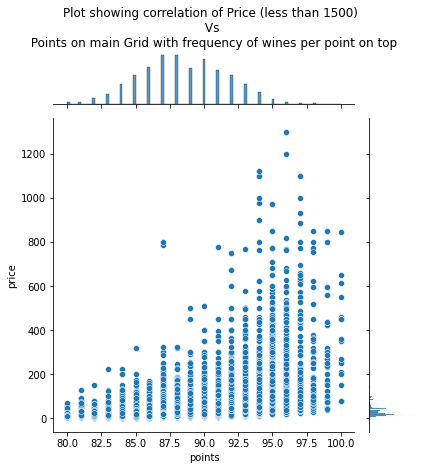

In [ ]:
p = sns.jointplot(x='points', y='price', data=df1[df1['price']<1500]); 
p.fig.suptitle("Plot showing correlation of Price (less than 1500) \n Vs \n Points on main Grid with frequency of wines per point on top", y=1.08);


In [ ]:
# Function to label containers on SNS BAR PLOT of specific bar value 

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

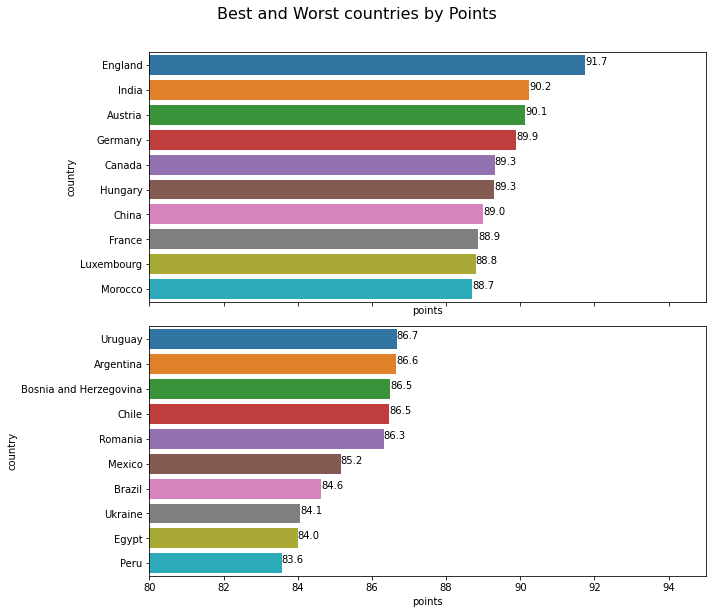

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8))
fig.suptitle('Best and Worst countries by Points', fontsize=16, y=1.06)
p1 = sns.barplot(ax=ax1, x=countries_to_plot['points'], y=countries_to_plot['country'][:10], orient='h')
p2 = sns.barplot(ax=ax2, x=countries_to_plot['points'], y=countries_to_plot['country'][-10:], orient='h')
plt.xlim((80,95))
show_values(p1, "h", space=0)
show_values(p2, "h", space=0)
plt.show()

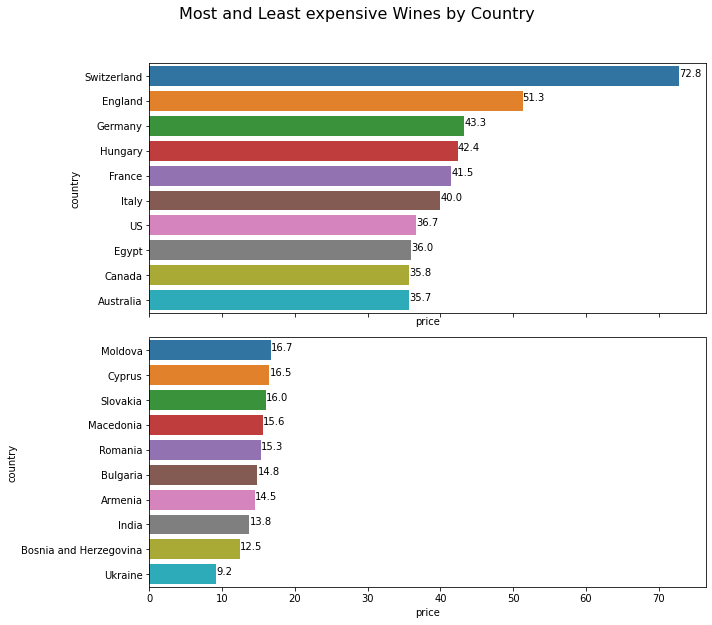

In [ ]:
# plot of highest and lowest wione prices by country 
countries_to_plot = countries_to_plot.sort_values(by=('price'), ascending=False)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8))
fig.suptitle('Most and Least expensive Wines by Country', fontsize=16, y=1.08)
p1 = sns.barplot(ax=ax1, x=countries_to_plot['price'], y=countries_to_plot['country'][:10], orient='h')
p2 = sns.barplot(ax=ax2, x=countries_to_plot['price'], y=countries_to_plot['country'][-10:], orient='h')

# adds each bar value to the container 
show_values(p1, "h", space=0)

show_values(p2, "h", space=0)

plt.show()

In [ ]:
df2 = df1.loc[df1['country'].isin(['US','France', 'Italy'])] # create DF with only selected countries data

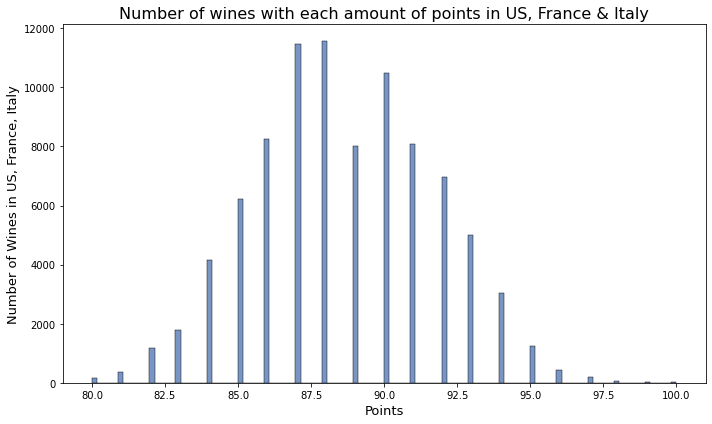

In [ ]:
# plot amount of wine per point in only countries:ITALY FRANCE US

sns.set_color_codes() 
plt.figure(figsize=(10,6));
sns.histplot(df2.points, kde=False, color='b');

plt.title("Number of wines with each amount of points in US, France & Italy" , fontsize=16);
plt.xlabel("Points" , fontsize=13);
plt.ylabel("Number of Wines in US, France, Italy" , fontsize=13);

Number of wines in DF2 consisting of US, France and Italy is: 88746 





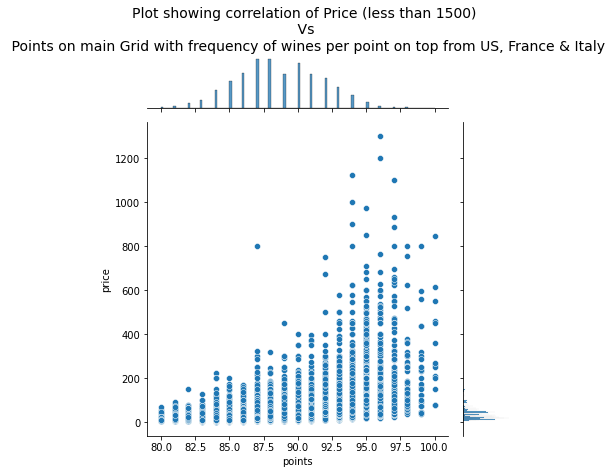

In [ ]:
# plot joint plot iwth frequency of wines in sleected countries with price less than 1500

p = sns.jointplot(x='points', y='price', data=df2[df2['price']<1500]);


p.fig.suptitle("Plot showing correlation of Price (less than 1500) \n \
Vs \n Points on main Grid with frequency of wines per point on top from US, France & Italy"\
, fontsize=14, y=1.09);


print ('Number of wines in DF2 consisting of US, France and Italy is: {} \n\n\n'.format(len(df2)))

In [ ]:
# create DF for each contry, listing average points and score per province 

df_US = df2.loc[df1['country'].isin(['US'])].groupby('province').mean().sort_values(by=('points'), ascending=False).reset_index()
df_FR = df2.loc[df1['country'].isin(['France'])].groupby('province').mean().sort_values(by=('points'), ascending=False).reset_index()
df_IT = df2.loc[df1['country'].isin(['Italy'])].groupby('province').mean().sort_values(by=('points'), ascending=False).reset_index()

In [ ]:
df_IT

,province,points,price
0,Piedmont,89.604185,55.613194
1,Tuscany,89.107401,47.582452
2,Lombardy,88.918919,37.002079
3,Italy Other,88.126984,32.095238
4,Sicily & Sardinia,88.107711,27.656059
5,Northeastern Italy,87.973564,26.958821
6,Southern Italy,87.816587,28.352472
7,Veneto,87.690924,33.568573
8,Central Italy,87.360989,25.995587
9,Northwestern Italy,87.272727,22.181818


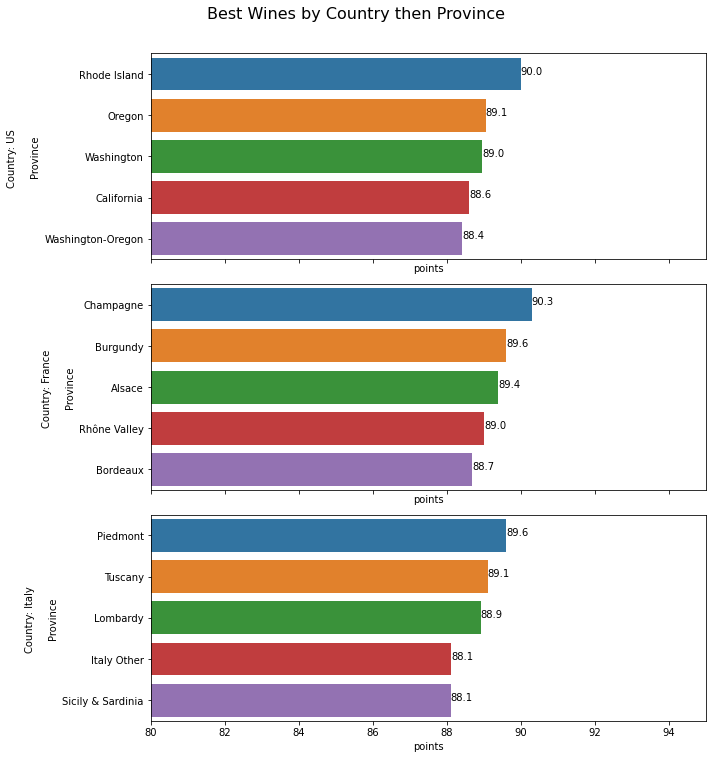

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,10)) # created 3 ax within the one figure 
fig.suptitle('Best Wines by Country then Province' , fontsize=16, y=1.05)

#Create barplots for specific country of hightest points per province 
p1 = sns.barplot(ax=ax1, x=df_US['points'], y=df_US['province'][:5], orient='h') 
p2 = sns.barplot(ax=ax2, x=df_FR['points'], y=df_FR['province'][:5], orient='h')
p3 = sns.barplot(ax=ax3, x=df_IT['points'], y=df_IT['province'][:5], orient='h')

plt.xlim((80,95))

#show values of containers 
show_values(p1, "h", space=0)
show_values(p2, "h", space=0)
show_values(p3, "h", space=0)

ax1.set( ylabel='Country: US \n\nProvince')
ax2.set( ylabel='Country: France \n\nProvince')
ax3.set( ylabel='Country: Italy \n\nProvince')
plt.show()

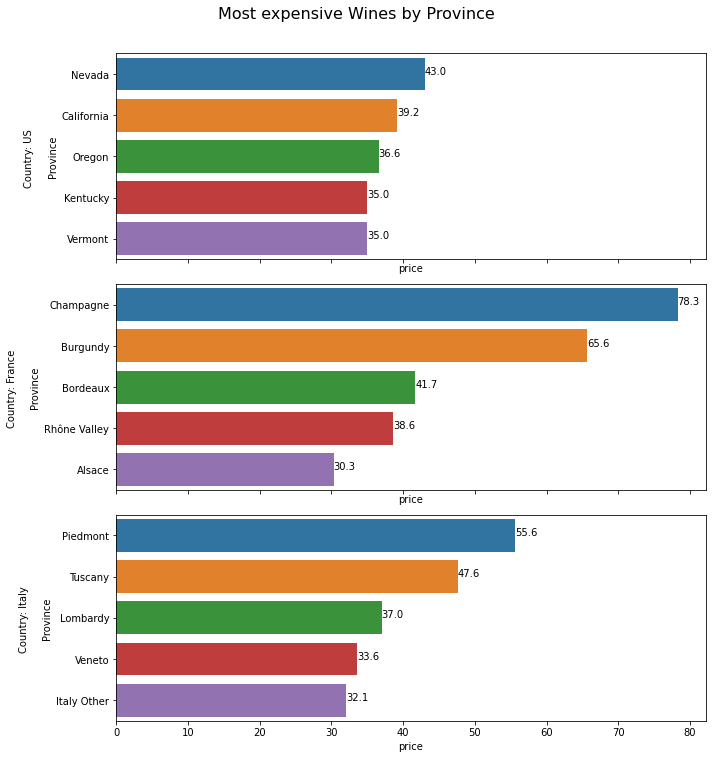

In [ ]:
df_US = df_US.sort_values(by=('price'), ascending=False)
df_FR = df_FR.sort_values(by=('price'), ascending=False)
df_IT = df_IT.sort_values(by=('price'), ascending=False)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,10))
fig.suptitle('Most expensive Wines by Province', fontsize=16, y=1.05)
p1 = sns.barplot(ax=ax1, x=df_US['price'], y=df_US['province'][:5], orient='h')
p2 = sns.barplot(ax=ax2, x=df_FR['price'], y=df_FR['province'][:5], orient='h')
p3 = sns.barplot(ax=ax3, x=df_IT['price'], y=df_IT['province'][:5], orient='h')

show_values(p1, "h", space=0)
show_values(p2, "h", space=0)
show_values(p3, "h", space=0)

ax1.set( ylabel='Country: US \n\nProvince')
ax2.set( ylabel='Country: France \n\nProvince')
ax3.set( ylabel='Country: Italy \n\nProvince')

plt.show()

In [ ]:
df_winery = df1.groupby(by=(['winery', 'country'])).mean().sort_values(by=('points'), ascending=False).reset_index()
df_winery['winery_country'] = df_winery.apply(lambda x: x['winery'] + ' - ' + x['country'], axis=1)

In [ ]:
df_winery

,winery,country,points,price,winery_country
0,Araujo,US,98.0,275.000000,Araujo - US
1,Gandona,US,97.0,190.000000,Gandona - US
2,Standish,Australia,97.0,121.666667,Standish - Australia
3,J.L. Chave,France,97.0,125.000000,J.L. Chave - France
4,Ovid,US,97.0,195.000000,Ovid - US
...,...,...,...,...,...
16930,Männle,Chile,80.0,15.000000,Männle - Chile
16931,Unión Vinícola del Este,Spain,80.0,10.000000,Unión Vinícola del Este - Spain
16932,Estrella Creek,US,80.0,29.000000,Estrella Creek - US
16933,Marcus James,Argentina,80.0,11.000000,Marcus James - Argentina


(90.0, 100.0)

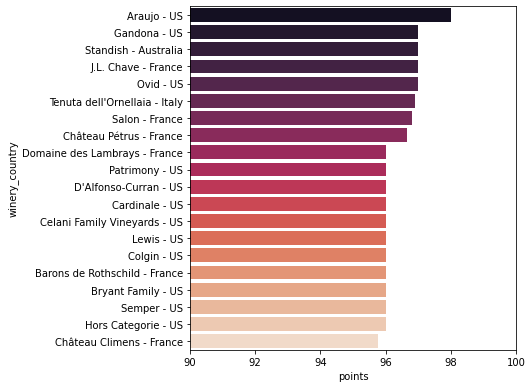

In [ ]:
p = sns.barplot(x=df_winery['points'], y=df_winery['winery_country'][:20], orient='h', palette='rocket');

plt.xlim((90,100))

In [ ]:
#tastes = ['Fruity', 'Earthy', 'Spicy', 'Smoky', 'Flowery', 'Acidic']
#taste_count = []
#for taste in tastes:
#  num = len(df1[df1['description'].str.contains(taste.lower())])
#  taste_count.append(num)
#print(taste_count)
#pd.Series(taste_count, index = tastes).plot(kind='bar')

4) Model

In [ ]:
# Create new column that counts individual words in each wine description 
df1['len_description'] = df1['description'].str.split().str.len() 

In [ ]:
df1

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,len_description
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,23,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,24
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,38
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,28
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,33
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119972,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),34
119973,US,Citation is given as much as a decade of bottl...,NaN,90,75,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation,38
119974,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser,43
119975,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,40


In [ ]:
df_len = df1.groupby(by=(['len_description', 'points'])).mean().sort_values(by=('len_description'), ascending=False).reset_index()

In [ ]:
df_len

,len_description,points,price
0,135,93,100.0
1,125,97,66.0
2,125,91,45.0
3,122,95,48.0
4,120,95,98.0
...,...,...,...
1349,6,81,62.0
1350,5,86,20.0
1351,5,87,20.0
1352,4,88,16.0


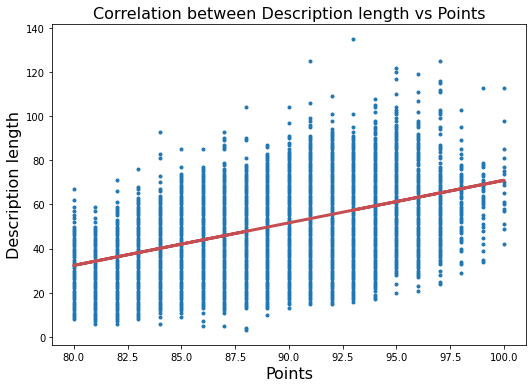

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 5.50]
plt.rcParams["figure.autolayout"] = True

x = df_len['points']
y = df_len['len_description']
plt.scatter(x, y, marker='.')
plt.title("Correlation between Description length vs Points", fontsize = 16)
plt.xlabel("Points", fontsize = 16)
plt.ylabel("Description length", fontsize = 16)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r-", linewidth=3.0)
plt.show()

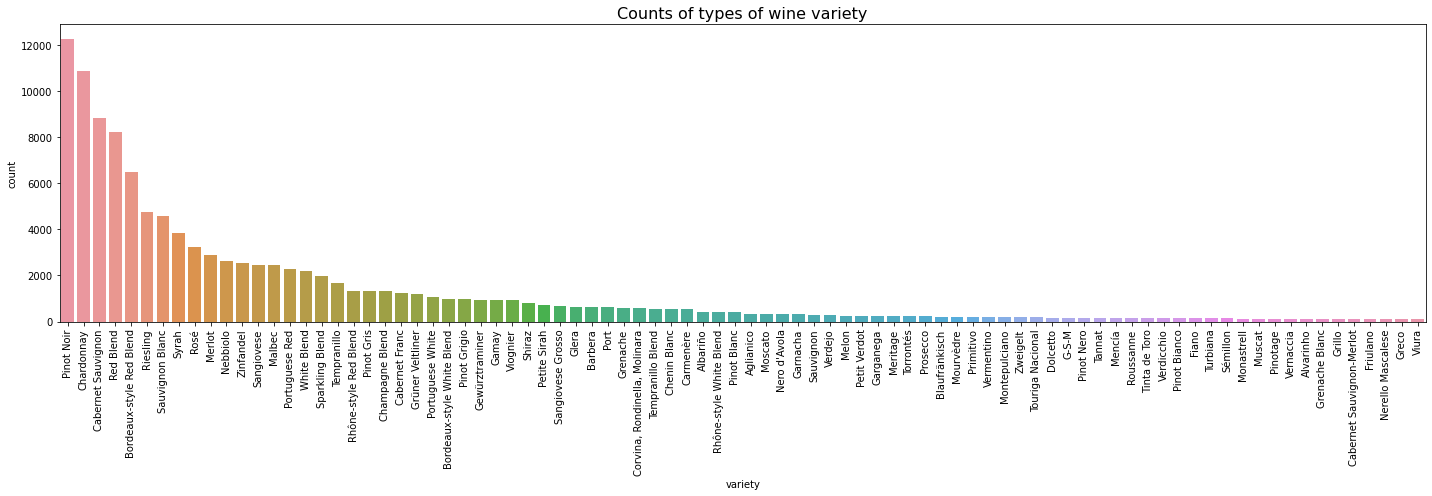

In [ ]:
# display bars of number of wine for each variety
data = df1.groupby('variety').filter(lambda x: len(x) >100) 
list = data.variety.value_counts().index.tolist()
fig4, ax4 = plt.subplots(figsize = (20,7))
sns.countplot(x='variety', data=data, order = list, ax=ax4)
plt.title("Counts of types of wine variety", fontsize = 16)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [ ]:
#Assign X and y values for the splitting 

X = df1.drop('points', axis=1)
y = df1['points']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 80347 samples in the training dataset
There are 39575 samples in the testing dataset
Each sample has 13 features


In [ ]:
from sklearn import naive_bayes
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

ValueError: ignored

In [ ]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42) 
param_list = [{'max_depth': range(1,18)}]
grid_tree = GridSearchCV(model, param_grid=param_list, scoring='accuracy' )
grid_tree.fit(X_train, y_train)
max_depth_max = grid_tree.best_params_['max_depth'] 
print("Best parameters: {}".format(max_depth_max))



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
85 fits failed out of a total of 85.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 166, in fit
    X, y, validate_separately=(check_X_params, check_y_params)
  File "/usr/local/lib/python3.7/dist-pack

ValueError: ignored